# Data cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('immo_data.csv')

In [3]:
data.shape

(268850, 49)

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [5]:
data.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [6]:
data.dtypes

regio1                       object
serviceCharge               float64
heatingType                  object
telekomTvOffer               object
telekomHybridUploadSpeed    float64
newlyConst                     bool
balcony                        bool
picturecount                  int64
pricetrend                  float64
telekomUploadSpeed          float64
totalRent                   float64
yearConstructed             float64
scoutId                       int64
noParkSpaces                float64
firingTypes                  object
hasKitchen                     bool
geo_bln                      object
cellar                         bool
yearConstructedRange        float64
baseRent                    float64
houseNumber                  object
livingSpace                 float64
geo_krs                      object
condition                    object
interiorQual                 object
petsAllowed                  object
street                       object
streetPlain                 

#### regio1 = Federal State (Bundesland)

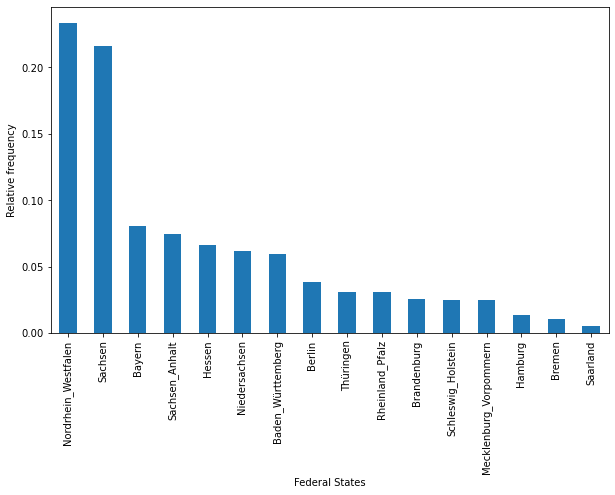

Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64

In [7]:
plt.figure(figsize=(10,6))
data.regio1.value_counts(normalize=True).plot(kind="bar")
plt.ylabel("Relative frequency")
plt.xlabel("Federal States")
plt.show()
data["regio1"].value_counts(dropna=False)

#### serviceCharge = aucilliary costs such as electricty or internet in € (Nebenkosten wie Strom oder Internet in €)

In [8]:
data["serviceCharge"].value_counts(dropna=False)

150.00    14293
100.00    12995
200.00    11147
120.00    10650
130.00     7455
          ...  
298.30        1
256.92        1
191.34        1
97.38         1
112.13        1
Name: serviceCharge, Length: 12267, dtype: int64

In [9]:
data["serviceCharge"].isna().sum()

6909

In [10]:
mean = round(data['serviceCharge'].mean(),2)
mean

151.21

##### unique values like .11 and .1 help to identify NaN-values after the replacement

In [11]:
#fillna(151.1)
data['serviceCharge'] = data['serviceCharge'].fillna(151.1)
data["serviceCharge"].value_counts(dropna=False).head(10)

150.0    14293
100.0    12995
200.0    11147
120.0    10650
130.0     7455
140.0     6997
80.0      6979
151.1     6913
180.0     6812
250.0     6422
Name: serviceCharge, dtype: int64

#### heatingType = Type of heating (Heizung)

In [12]:
data["heatingType"].value_counts(dropna=False)

central_heating                   128977
NaN                                44856
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating                     901
stove_heating                        344
solar_heating                        166
Name: heatingType, dtype: int64

In [13]:
# .fillna('unknown')
data["heatingType"] = data["heatingType"].fillna('unknown')
data["heatingType"].value_counts(dropna=False)

central_heating                   128977
unknown                            44856
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating                     901
stove_heating                        344
solar_heating                        166
Name: heatingType, dtype: int64

#### telekomTvOffer = Is payed TV included if so which offer (Ist Pay-TV inklusive wenn ja welches Angebot)

In [14]:
data["telekomTvOffer"].value_counts(dropna=False)

ONE_YEAR_FREE    227632
NaN               32619
NONE               4957
ON_DEMAND          3642
Name: telekomTvOffer, dtype: int64

In [16]:
#.fillna('unknown')
data["telekomTvOffer"] = data["telekomTvOffer"].fillna('unknown')
data["telekomTvOffer"].value_counts(dropna=False)

ONE_YEAR_FREE    227632
unknown           32619
NONE               4957
ON_DEMAND          3642
Name: telekomTvOffer, dtype: int64

#### telekomHybridUploadSpeed = how fast is the hybrid inter upload speed (Wie schnell ist die Hybrid-Inter-Upload-Geschwindigkeit?)

In [17]:
data["telekomHybridUploadSpeed"].value_counts(dropna=False)

NaN     223830
10.0     45020
Name: telekomHybridUploadSpeed, dtype: int64

In [18]:
#.fillna(0.0)
data["telekomHybridUploadSpeed"] = data["telekomHybridUploadSpeed"].fillna(int(0.0))
data["telekomHybridUploadSpeed"].value_counts(dropna=False)

0.0     223830
10.0     45020
Name: telekomHybridUploadSpeed, dtype: int64

#### newlyConst = is the building newly constructed (Neubau)

In [19]:
data["newlyConst"].value_counts(dropna=False)

False    247679
True      21171
Name: newlyConst, dtype: int64

#### balcony = does the object have a balcony (Balkon)

In [20]:
data["balcony"].value_counts(dropna=False)

True     165734
False    103116
Name: balcony, dtype: int64

#### picturecount = how many pictures were uploaded to the listing (Bildanzahl auf Website)

In [21]:
data["picturecount"].value_counts(dropna=False).head(20)

8     21930
7     21429
9     21421
10    19819
6     18848
11    16741
5     15605
12    14430
4     12315
13    11909
3     11536
2     11210
14    10288
1      8965
15     8709
16     6691
17     5417
0      4971
18     4356
19     3704
Name: picturecount, dtype: int64

#### pricetrend = price trend as calculated by Immoscout24 (Preisentwicklung wie von Immoscout24 berechnet)

In [22]:
data["pricetrend"].value_counts(dropna=False)

 0.00     11082
 3.33      2211
 3.23      2042
 3.85      1884
 NaN       1832
          ...  
-1.81         1
 10.61        1
-1.42         1
 0.08         1
-0.45         1
Name: pricetrend, Length: 1235, dtype: int64

In [23]:
round(data["pricetrend"].describe(),0).T

count    267018.0
mean          3.0
std           2.0
min         -12.0
25%           2.0
50%           3.0
75%           5.0
max          15.0
Name: pricetrend, dtype: float64

In [24]:
mean = round(data['pricetrend'].mean(),2)
mean

3.39

In [25]:
#.fillna(mean)
data['pricetrend'] = data['pricetrend'].fillna(mean)
data["pricetrend"].value_counts(dropna=False).head(10)

0.00    11082
3.39     3211
3.33     2211
3.23     2042
3.85     1884
3.57     1720
0.19     1693
1.92     1656
3.17     1648
1.69     1640
Name: pricetrend, dtype: int64

#### telekomUploadSpeed = how fast is the internet upload speed (Wie schnell ist die Internet-Upload-Geschwindigkeit?)

In [26]:
data["telekomUploadSpeed"].value_counts(dropna=False)

40.0     158296
2.4       42858
NaN       33358
10.0      32889
5.0        1036
1.0         209
100.0       141
4.0          63
Name: telekomUploadSpeed, dtype: int64

In [27]:
data["telekomUploadSpeed"] = data["telekomUploadSpeed"].fillna(int(40.0))
data["telekomUploadSpeed"].value_counts(dropna=False)

40.0     191654
2.4       42858
10.0      32889
5.0        1036
1.0         209
100.0       141
4.0          63
Name: telekomUploadSpeed, dtype: int64

#### totalRent = total rent (Bruttokaltmiete=Nettokaltmiete (Grundmiete ohne Nebenkosten) + Nebenkosten)

In [28]:
data["totalRent"].value_counts(dropna=False)

NaN        40517
500.00      1897
450.00      1892
600.00      1805
550.00      1668
           ...  
1644.97        1
841.10         1
524.93         1
546.49         1
1479.64        1
Name: totalRent, Length: 28487, dtype: int64

In [29]:
round(data["totalRent"].describe(),0).T

count      228333.0
mean          901.0
std         33238.0
min             0.0
25%           470.0
50%           650.0
75%           985.0
max      15751535.0
Name: totalRent, dtype: float64

In [30]:
data.loc[data['totalRent'] >= 10000].head(2)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
8406,Baden_Württemberg,151.1,unknown,ONE_YEAR_FREE,0.0,False,True,13,3.90,5.0,1234567.0,NaN,107360251,NaN,NaN,True,Baden_Württemberg,False,NaN,1234567.0,29,76.0,Rhein_Neckar_Kreis,NaN,NaN,NaN,Kastanienweg,Kastanienweg,False,9,apartment,68789,4.0,NaN,NaN,NaN,4,False,3,Rhein_Neckar_Kreis,Sankt_Leon_Rot,Komplett eingerichtete Wohnung in 68789 St. Le...,NaN,NaN,NaN,NaN,90.76,0.1985,Sep18
14123,Hessen,1400.0,self_contained_central_heating,ONE_YEAR_FREE,0.0,False,True,2,5.13,40.0,13400.0,1900.0,98567656,NaN,gas,False,Hessen,False,1.0,12000.0,17-19,600.0,Frankfurt_am_Main,negotiable,luxury,negotiable,Auf der K&ouml;rnerwiese,Auf_der_Körnerwiese,True,9,maisonette,60322,15.0,NaN,4.0,5.0,5,False,7,Frankfurt_am_Main,Westend_Nord,"Über die hellen, mit Granit verkleideten Trepp...",Durch die noch freie Innengestaltung können \n...,NaN,NaN,2008.0,NaN,NaN,Oct19


In [31]:
#.drop>=10000
data.drop(data.loc[data['totalRent']>=10000].index, inplace=True)

In [32]:
data.loc[data['totalRent'] <= 100].head(2)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
1119,Sachsen,105.0,central_heating,ONE_YEAR_FREE,10.0,False,False,10,-0.65,2.4,0.0,1973.0,94258021,NaN,gas,False,Sachsen,True,3.0,210.0,NaN,49.8,Erzgebirgskreis,NaN,NaN,NaN,no_information,NaN,False,1,apartment,9430,2.0,NaN,1.0,1.0,2,True,2,Erzgebirgskreis,Drebach,Diese gemütliche 2-Raumwohnung befindet sich i...,NaN,NaN,NaN,NaN,NaN,NaN,Oct19
1883,Nordrhein_Westfalen,75.0,night_storage_heater,ONE_YEAR_FREE,0.0,False,True,6,4.28,40.0,0.0,1964.0,111407942,0.0,electricity,False,Nordrhein_Westfalen,True,2.0,295.0,54,40.0,Essen,well_kept,normal,negotiable,Brigittastr.,Brigittastr.,False,1,apartment,45130,1.0,102.72,2.0,0.0,1,False,1,Essen,Rüttenscheid,2. Obergeschoss in einem gepflegten Mehrfamili...,- 2. Obergeschoss\n- Nachtspeicher-Heizung\n- ...,0.0,NO_INFORMATION,NaN,NaN,NaN,May19


In [33]:
#.drop<=100
data.drop(data.loc[data['totalRent']<=100].index, inplace=True)

In [34]:
data.drop(data.loc[data['totalRent']>=10000].index, inplace=True)

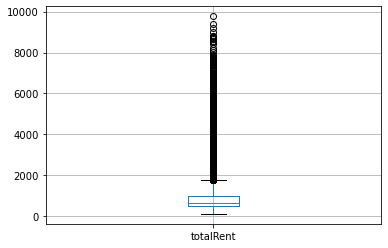

In [35]:
data[['totalRent']].boxplot()
plt.show()

In [36]:
round(data["totalRent"].describe(),0).T

count    227980.0
mean        814.0
std         546.0
min         105.0
25%         470.0
50%         650.0
75%         985.0
max        9774.0
Name: totalRent, dtype: float64

In [37]:
data.loc[data['totalRent'] == 814.11]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
41405,Mecklenburg_Vorpommern,139.65,unknown,ONE_YEAR_FREE,0.0,False,False,10,2.36,40.0,814.11,NaN,112307727,NaN,NaN,False,Mecklenburg_Vorpommern,True,NaN,674.46,28,55.86,Stralsund,first_time_use,NaN,NaN,Friedrich-Engels-Str.,Friedrich-Engels-Str.,False,5,apartment,18439,2.0,NaN,1.0,NaN,2,False,2,Stralsund,Tribseer_Vorstadt,Modernes Wohnen in guter Lage - erfüllt Ihnen ...,NaN,55.86,NaN,NaN,NaN,NaN,Oct19


In [38]:
# replace NaN-values with unique value near the 50% quantil
mean = round(data['totalRent'].mean(),2)
print("The mean is: ",mean)
data['totalRent'] = data['totalRent'].fillna(814.11)
data["totalRent"].value_counts(dropna=False).head(10)

The mean is:  813.63


814.11    40518
500.00     1897
450.00     1892
600.00     1805
550.00     1668
400.00     1500
750.00     1495
650.00     1486
800.00     1427
700.00     1417
Name: totalRent, dtype: int64

#### yearConstructed = year Constructed (Baujahr)

In [39]:
data["yearConstructed"].value_counts(dropna=False)

NaN       56971
2019.0    10950
1900.0    10346
2018.0     8754
1995.0     4386
          ...  
1534.0        1
1539.0        1
1724.0        1
1378.0        1
1472.0        1
Name: yearConstructed, Length: 466, dtype: int64

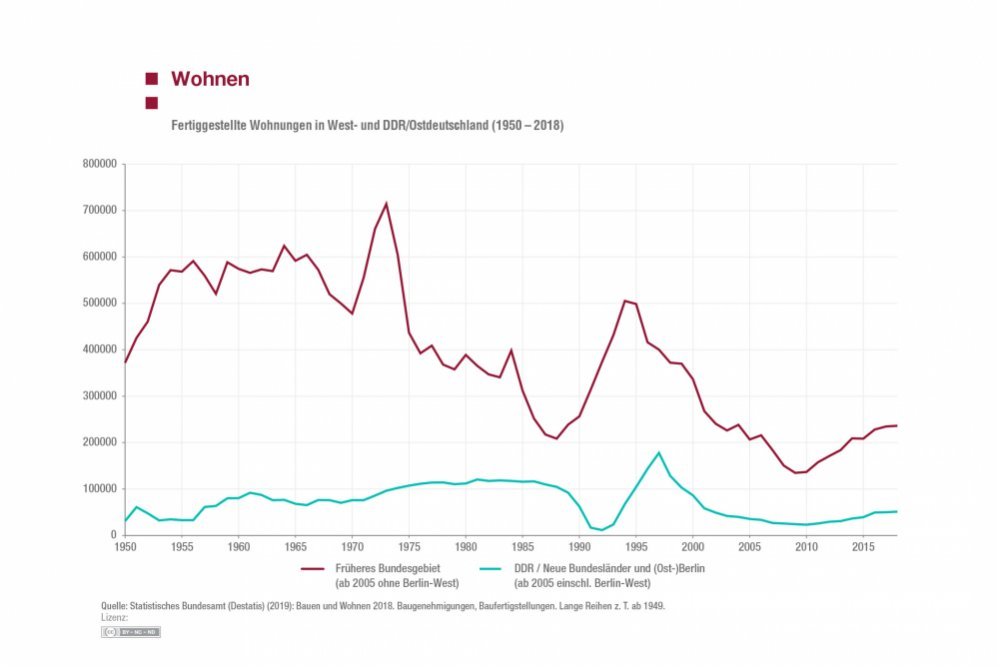
source: https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47280/wohnen/

In [40]:
data.loc[data['yearConstructed'] == 1973.1]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date


In [41]:
# replace NaN-values with unique value near the historic peak in 1973
data['yearConstructed'] = data['yearConstructed'].fillna(1973.1)
data["yearConstructed"].value_counts(dropna=False).head(10)

1973.1    56971
2019.0    10950
1900.0    10346
2018.0     8754
1995.0     4386
1996.0     4339
1910.0     4283
2017.0     3899
1972.0     3841
1960.0     3834
Name: yearConstructed, dtype: int64

In [42]:
data.loc[data['yearConstructed'] >= 2022].shape

(7, 49)

In [43]:
data.drop(data.loc[data['yearConstructed'] >= 2022].index, inplace=True)

#### scoutId = identification number (Identifikationsnummer)

In [44]:
round(data["scoutId"].describe(),0).T

count       268490.0
mean     106972266.0
std       12501925.0
min       28871743.0
25%      106700313.0
50%      111159069.0
75%      113769020.0
max      115711743.0
Name: scoutId, dtype: float64

#### noParkSpaces = number of parking slots (Anzahl Parkplätze)

In [45]:
data["noParkSpaces"].value_counts(dropna=False).head(10)

NaN     175573
1.0      78759
2.0       8937
0.0       3803
3.0        413
4.0        135
20.0        87
10.0        73
5.0         73
6.0         53
Name: noParkSpaces, dtype: int64

In [46]:
# decide to replace NaN-value with value of 0
data['noParkSpaces'] = data['noParkSpaces'].fillna(0)
data["noParkSpaces"].value_counts(dropna=False).head(10)
# decide to replace value >4 with 0 because it is unthinkable that those belongs to a apartment
data.loc[data['noParkSpaces'] > 4, 'noParkSpaces'] = 0
data["noParkSpaces"].value_counts(dropna=False).head(10)

0.0    180246
1.0     78759
2.0      8937
3.0       413
4.0       135
Name: noParkSpaces, dtype: int64

#### firingTypes = type of heating (Heizungsart)

In [47]:
data["firingTypes"].value_counts(dropna=False).head(60)

gas                                                                                110708
NaN                                                                                 56887
district_heating                                                                    49353
oil                                                                                 18114
natural_gas_light                                                                   10072
electricity                                                                          4820
natural_gas_heavy                                                                    4542
pellet_heating                                                                       2475
geothermal                                                                           2441
gas:electricity                                                                      1354
local_heating                                                                         932
environmen

In [48]:
data['firingTypes'] = data['firingTypes'].fillna('unknown')
data.loc[data['firingTypes'].str.contains('gas'), 'firingTypes'] = 'gas'
data.loc[data['firingTypes'].str.contains('oil'), 'firingTypes'] = 'oil'
data.loc[data['firingTypes'].str.contains('fuels'), 'firingTypes'] = 'oil'
data.loc[data['firingTypes'].str.contains('electricity'), 'firingTypes'] = 'electricity'
data.loc[data['firingTypes'].str.contains('wood'), 'firingTypes'] = 'wood'
data.loc[data['firingTypes'].str.contains('coal'), 'firingTypes'] = 'coal'
data.loc[data['firingTypes'].str.contains('solar'), 'firingTypes'] = 'solar'
data.loc[data['firingTypes'].str.contains('hydro'), 'firingTypes'] = 'hydro_energy'
data.loc[data['firingTypes'].str.contains('geothermal'), 'firingTypes'] = 'geothermal'
data.loc[data['firingTypes'].str.contains('pellet'), 'firingTypes'] = 'pellet_heating'
data.loc[data['firingTypes'].str.contains('wind'), 'firingTypes'] = 'wind_energy'
data.loc[data['firingTypes'].str.contains('district'), 'firingTypes'] = 'district_heating'
data.loc[data['firingTypes'].str.contains('heat_supply'), 'firingTypes'] = 'district_heating'
data.loc[data['firingTypes'].str.contains('bio_energy'), 'firingTypes'] = 'bio_energy'
data.loc[data['firingTypes'].str.contains('combined_heat_and_power_'), 'firingTypes'] = 'combined_heat_and_power_renewable_energy'


In [49]:
data["firingTypes"].value_counts(dropna=False).tail(60)

gas                                         128185
unknown                                      56887
district_heating                             50696
oil                                          19198
electricity                                   5296
pellet_heating                                2479
geothermal                                    2457
local_heating                                  932
environmental_thermal_energy                   900
solar                                          530
wood                                           374
combined_heat_and_power_renewable_energy       279
bio_energy                                     148
coal                                            62
hydro_energy                                    52
wind_energy                                     15
Name: firingTypes, dtype: int64

#### hasKitchen = presence of a kitchen (Vorhandensein einer Küche)

In [50]:
data["hasKitchen"].value_counts(dropna=False)

False    176514
True      91976
Name: hasKitchen, dtype: int64

#### geo_bln = Federal State (Bundesland)

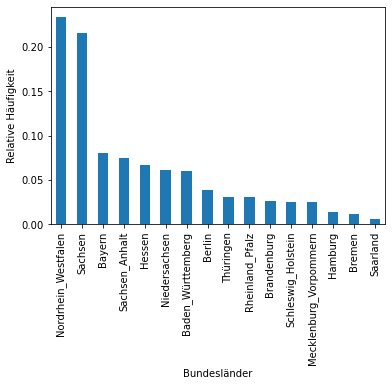

Nordrhein_Westfalen       62768
Sachsen                   58022
Bayern                    21587
Sachsen_Anhalt            20113
Hessen                    17836
Niedersachsen             16571
Baden_Württemberg         16068
Berlin                    10390
Thüringen                  8382
Rheinland_Pfalz            8364
Brandenburg                6946
Schleswig_Holstein         6664
Mecklenburg_Vorpommern     6633
Hamburg                    3757
Bremen                     2963
Saarland                   1426
Name: geo_bln, dtype: int64

In [51]:
data.geo_bln.value_counts(normalize=True).plot(kind="bar")
plt.ylabel("Relative Häufigkeit")
plt.xlabel("Bundesländer")
plt.show()
data["geo_bln"].value_counts(dropna=False)

#### cellar = presence of a cellar (Keller)

In [52]:
data["cellar"].value_counts(dropna=False)

True     171989
False     96501
Name: cellar, dtype: int64

#### yearConstructedRange = time from building in bins

In [53]:
data["yearConstructedRange"].value_counts(dropna=False).head(60)

NaN    56971
1.0    54123
2.0    45592
9.0    28656
5.0    26281
3.0    24235
4.0    17962
8.0     7566
6.0     3635
7.0     3469
Name: yearConstructedRange, dtype: int64

In [54]:
mean = round(data['yearConstructedRange'].mean(),2)
print("The mean is: ",mean)
data['yearConstructedRange'] = data['yearConstructedRange'].fillna(4.1)
data["yearConstructedRange"].value_counts(dropna=False).head(10)

The mean is:  3.71


4.1    56971
1.0    54123
2.0    45592
9.0    28656
5.0    26281
3.0    24235
4.0    17962
8.0     7566
6.0     3635
7.0     3469
Name: yearConstructedRange, dtype: int64

#### baseRent = basic rent (Nettokaltmiete)

In [55]:
data["baseRent"].value_counts(dropna=False).head()

350.0    3805
450.0    3555
300.0    3148
400.0    2980
650.0    2902
Name: baseRent, dtype: int64

In [56]:
data["baseRent"].isna().sum()

0

In [57]:
round(data["baseRent"].describe(),0).T

count     268490.0
mean         685.0
std        19307.0
min            0.0
25%          338.0
50%          490.0
75%          799.0
max      9999999.0
Name: baseRent, dtype: float64

In [58]:
data.loc[data['baseRent'] >= 10000]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
1648,Hessen,1200.0,central_heating,ONE_YEAR_FREE,0.0,True,True,3,5.10,40.0,814.11,2019.0,113573895,2.0,gas,True,Hessen,True,9.0,10000.0,NaN,440.00,Frankfurt_am_Main,first_time_use,luxury,negotiable,no_information,NaN,True,9,apartment,60487,8.5,NaN,1.0,4.0,5,False,7,Frankfurt_am_Main,Bockenheim,"Dieses „Schmuckstück“, befindet sich in belieb...",Dieses exklusive Unikat beläuft sich über 2 Et...,NaN,NaN,2019.0,NaN,NaN,Oct19
16731,Sachsen,151.1,central_heating,ONE_YEAR_FREE,0.0,False,True,1,4.07,40.0,814.11,1973.1,115233180,0.0,unknown,False,Sachsen,True,4.1,120000.0,70,65.72,Leipzig,need_of_renovation,normal,NaN,Coppistra&szlig;e,Coppistraße,False,9,raised_ground_floor,4157,3.0,NaN,NaN,NaN,3,False,3,Leipzig,Gohlis_Mitte,Es steht eine Wohnung in diesem attraktiven De...,Die Immobiliendetails auf einen Blick:\n \n- g...,NaN,NaN,NaN,NaN,NaN,Feb20
71110,Berlin,400.0,heat_pump,ONE_YEAR_FREE,0.0,True,True,34,8.01,10.0,814.11,2018.0,105274614,0.0,unknown,True,Berlin,False,9.0,10816.0,4c,416.00,Berlin,first_time_use,sophisticated,negotiable,Kaiserstrasse,Kaiserstrasse,True,9,NaN,12209,11.0,53.0,0.0,4.0,5,True,7,Berlin,Lichterfelde_Steglitz,Ein schöner Neubau in skandinavischen Still im...,Der Innenausbau kann noch mitgestaltet werden,NaN,A,NaN,NaN,NaN,May19
154804,Hessen,1200.0,central_heating,ONE_YEAR_FREE,0.0,True,True,3,5.10,40.0,814.11,2019.0,113651405,2.0,gas,True,Hessen,True,9.0,10500.0,NaN,405.00,Frankfurt_am_Main,first_time_use,luxury,negotiable,no_information,NaN,True,9,apartment,60487,5.5,NaN,2.0,4.0,5,False,7,Frankfurt_am_Main,Bockenheim,"Dieses „Schmuckstück“, befindet sich in belieb...",Dieses Penthouse ist an Klasse nicht zu übertr...,NaN,NaN,2019.0,NaN,NaN,Oct19
176647,Bremen,78.0,central_heating,ONE_YEAR_FREE,0.0,False,False,2,4.62,10.0,449.90,1957.0,107354082,0.0,gas,False,Bremen,True,2.0,30990.0,3,47.67,Bremen,NaN,NaN,negotiable,H&ouml;xterstra&szlig;e,Höxterstraße,False,9,roof_storey,28277,3.0,192.4,2.0,2.0,3,False,2,Bremen,Kattenesch,In Kattenesch befinden sich 406 unserer Wohnun...,Die helle und gutgeschnittene Wohnung bietet I...,62.0,NO_INFORMATION,NaN,90.76,0.1845,Sep18
181618,Sachsen,165.0,central_heating,ONE_YEAR_FREE,0.0,False,False,11,1.41,40.0,814.11,1973.1,84621450,0.0,unknown,False,Sachsen,False,4.1,39200.0,NaN,49.00,Dresden,mint_condition,sophisticated,NaN,no_information,NaN,True,9,roof_storey,1109,1.0,NaN,3.0,4.0,1,False,2,Dresden,Klotzsche,Die extravagante Wohnung befindet sich im Dach...,- Lift\r\n- Bad mit Wanne und Fenster (Oberlic...,NaN,NaN,NaN,NaN,NaN,May19
213625,Bayern,140.0,central_heating,ONE_YEAR_FREE,0.0,False,True,15,6.49,40.0,2390.00,1892.0,107309166,0.0,district_heating,False,Bayern,True,1.0,20100.0,23,110.00,München,well_kept,normal,no,Thierschstra&szlig;e,Thierschstraße,False,9,apartment,80538,3.0,NaN,3.0,5.0,3,False,5,München,Lehel,"Wunderschöner, alter sehr gepflegter Altbaubau...",Es erwartet Sie eine sehr geräumige und helle ...,150.0,NaN,NaN,90.76,0.1985,Sep18
243713,Nordrhein_Westfalen,25000.0,floor_heating,ONE_YEAR_FREE,0.0,False,True,12,3.61,40.0,814.11,1984.0,111426318,1.0,electricity,False,Nordrhein_Westfalen,True,4.0,120000.0,15 a,14000.00,Essen,well_kept,sophisticated,NaN,Weg zur Platte,Weg_zur_Platte,False,9,apartment,45133,3.5,58.6,1.0,NaN,3,False,7,Essen,Bredeney,Die Wohnung liegt im 1. Obergeschoss in einem ...,Die Wohnung wird im gepflegten Zustand übergeb...,NaN,NaN,NaN,NaN,NaN,May19
264934,Saar

In [59]:
data.loc[data['baseRent'] <= 100]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
201,Sachsen,90.00,central_heating,ONE_YEAR_FREE,0.0,False,False,7,0.00,40.0,814.11,1900.0,108372054,0.0,gas,False,Sachsen,False,1.0,0.0,16,45.34,Zwickau,fully_renovated,normal,NaN,Franz-Mehring-Stra&szlig;e,Franz-Mehring-Straße,False,1,apartment,8058,2.0,111.57,1.0,NaN,2,False,2,Zwickau,Nordvorstadt,Sie sind ein fleißiger und handwerklich begabt...,"Bad mit Wanne und Fenster, unrenoviert, Keller",NaN,NaN,NaN,NaN,NaN,May19
1377,Saarland,151.10,unknown,ONE_YEAR_FREE,10.0,False,False,7,2.46,2.4,700.00,1956.0,108643336,1.0,district_heating,False,Saarland,False,2.0,0.0,NaN,30.00,Saarlouis_Kreis,fully_renovated,normal,no,no_information,NaN,False,1,apartment,66740,1.0,270.10,NaN,2.0,1,False,1,Saarlouis_Kreis,Saarlouis,Dieses Appartement besteht aus einem Wohn- Sch...,Die Wohnung ist voll möbiliert mit Fernseher u...,NaN,NaN,NaN,NaN,NaN,Feb20
2045,Nordrhein_Westfalen,154.00,central_heating,ONE_YEAR_FREE,0.0,False,False,1,3.30,40.0,731.50,1902.0,115454960,0.0,gas,False,Nordrhein_Westfalen,False,1.0,0.0,6,77.00,Unna_Kreis,well_kept,NaN,yes,Bahnhofstr.,Bahnhofstr.,False,1,NaN,59174,2.5,NaN,NaN,NaN,2,False,3,Unna_Kreis,Kamen,Das charmante Fachwerkhaus verfügt im Erdgesch...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
6911,Bayern,151.10,central_heating,ONE_YEAR_FREE,0.0,False,False,7,6.58,10.0,370.00,1973.1,113267651,0.0,oil,False,Bayern,False,4.1,0.0,NaN,42.00,Landshut_Kreis,NaN,NaN,negotiable,no_information,NaN,False,1,ground_floor,84166,1.0,NaN,NaN,1.0,1,False,2,Landshut_Kreis,Adlkofen,Dieses Teilmöblierte Appartement liegt in ruhi...,Das Appartement ist teilmöbliert und die vorha...,NaN,NaN,NaN,NaN,NaN,Oct19
8987,Nordrhein_Westfalen,30.00,stove_heating,ONE_YEAR_FREE,0.0,False,False,5,3.61,40.0,814.11,1973.1,58486023,0.0,gas,False,Nordrhein_Westfalen,False,4.1,90.0,31,10.00,Siegen_Wittgenstein_Kreis,well_kept,NaN,no,Hundgasse,Hundgasse,False,1,NaN,57072,1.0,NaN,0.0,3.0,1,False,1,Siegen_Wittgenstein_Kreis,Siegen,Das möblierte Zimmer mit separatem Eingang bef...,Das kleine geflieste Bad mit Fenster ist mit D...,NaN,NaN,NaN,NaN,NaN,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264041,Saarland,151.10,district_heating,ONE_YEAR_FREE,10.0,False,False,8,2.86,2.4,450.00,1973.1,107318389,0.0,unknown,False,Saarland,False,4.1,0.0,NaN,30.00,Saarlouis_Kreis,NaN,normal,no,no_information,NaN,False,1,ground_floor,66740,1.0,NaN,NaN,2.0,1,False,1,Saarlouis_Kreis,Saarlouis,"Ein Wohn- Schlafraum, eine EBK mit Kühlschrank...",NaN,NaN,NaN,NaN,90.76,0.1985,Sep18
265287,Saarland,151.10,floor_heating,ONE_YEAR_FREE,0.0,False,False,0,1.72,10.0,814.11,1973.1,105621115,0.0,unknown,False,Saarland,False,4.1,0.0,NaN,55.00,Stadtverband_Saarbrücken_Kreis,NaN,NaN,NaN,no_information,NaN,False,1,roof_storey,66333,1.0,NaN,NaN,NaN,1,False,2,Stadtverband_Saarbrücken_Kreis,Völklingen,PREIS AUF ANFRAGE\n\nSchöne 2ZKB Wohnung in Vö...,NaN,NaN,NaN,NaN,90.76,0.2195,Sep18
265934,Sachsen_Anhalt,132.48,district_heating,unknown,0.0,False,False,11,1.67,40.0,282.96,1973.1,108998632,0.0,unknown,False,Sachsen_Anhalt,False,4.1,99.0,X,57.60,Jerichower_Land_Kreis,modernized,normal,yes,S&uuml;dring,Südring,False,1,apartment,39288,3.0,NaN,NaN,NaN,3,False,2,Jerichower_Land_Kreis,Burg,"Sie sind Handwerker? Und haben Zeit, aber kein...","Helle Räume, Bad mit Badewanne, Gegensprech

In [60]:
data.drop(data.loc[data['baseRent']>=10000].index, inplace=True)
data.drop(data.loc[data['baseRent']<=100].index, inplace=True)

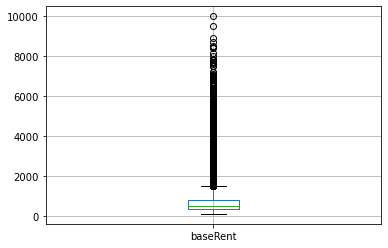

In [61]:
data[['baseRent']].boxplot()
plt.show()

#### houseNumber = house Number (Hausnummer)

In [62]:
data["houseNumber"].value_counts(dropna=False).head()

NaN    70741
1       7161
2       6774
4       5811
3       5703
Name: houseNumber, dtype: int64

In [63]:
data['houseNumber'] = data['houseNumber'].fillna(1)

#### livingSpace = living space in m² (Wohnfläche in m²)

In [64]:
data["livingSpace"].value_counts(dropna=False).head()

60.0    5176
70.0    4147
80.0    4025
65.0    3802
75.0    3680
Name: livingSpace, dtype: int64

In [65]:
data["livingSpace"].isna().sum()

0

In [66]:
data.loc[data['livingSpace'] >= 1000]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
51540,Brandenburg,146.00,central_heating,ONE_YEAR_FREE,10.0,False,False,8,4.33,2.4,650.00,1996.0,109860941,1.0,gas,True,Brandenburg,True,5.0,504.00,25,8684.00,Barnim_Kreis,modernized,NaN,NaN,Danckelmannstra&szlig;e,Danckelmannstraße,False,4,NaN,16225,3.0,84.00,4.0,4.0,3,True,7,Barnim_Kreis,Eberswalde,Das Wohnhaus wurde im Jahre 1996 neu errichtet...,In den Wohnräumen wurde Parkettfußboden verleg...,NaN,NO_INFORMATION,NaN,NaN,NaN,Oct19
92451,Bayern,111.00,unknown,ONE_YEAR_FREE,10.0,True,False,30,3.58,2.4,814.11,2019.0,110383735,0.0,gas,False,Bayern,False,9.0,800.00,1,2257.88,Nürnberger_Land_Kreis,NaN,NaN,NaN,no_information,NaN,False,5,NaN,90518,75.5,38.20,NaN,NaN,5,False,7,Nürnberger_Land_Kreis,Altdorf_bei_Nürnberg,"*****Bitte beachten Sie, der angegebene Preis ...",NaN,NaN,NaN,NaN,NaN,NaN,May19
151184,Bayern,115.00,central_heating,ONE_YEAR_FREE,0.0,False,False,23,6.09,40.0,1400.00,1987.0,109350573,1.0,oil,False,Bayern,True,4.0,1200.00,31,66100.00,München,well_kept,sophisticated,negotiable,Neubiberger Stra&szlig;e,Neubiberger_Straße,False,7,roof_storey,81737,2.0,110.00,2.0,3.0,2,True,7,München,Perlach,+ kleines gepflegtes Mehrfamilienhaus\n\n+ 2-Z...,Die gut geschnittene und ruhige Zwei-Zimmer-Wo...,85.00,D,2019.0,NaN,NaN,May19
172399,Sachsen,60.00,central_heating,ONE_YEAR_FREE,10.0,False,False,5,1.24,2.4,260.00,1973.1,111349875,0.0,gas,False,Sachsen,True,4.1,200.00,1,4340.00,Plauen,well_kept,NaN,negotiable,no_information,NaN,False,1,apartment,8529,2.0,NaN,1.0,2.0,2,False,7,Plauen,Reusa_mit_Sorga,Ihre neue Wohnung befindet sich in einem ruhig...,"- Tageslichtbad mit Wanne\r\n- Wohnzimmer, Sch...",NaN,NaN,NaN,NaN,NaN,May19
175397,Sachsen_Anhalt,151.10,unknown,unknown,0.0,False,False,0,4.61,40.0,369.00,1973.1,113363197,0.0,unknown,False,Sachsen_Anhalt,False,4.1,679.00,2,111111.00,Altmarkkreis_Salzwedel,NaN,NaN,NaN,G&uuml;ssefelder Dorfstra&szlig;e,Güssefelder_Dorfstraße,False,5,apartment,39624,3.0,NaN,NaN,NaN,3,False,7,Altmarkkreis_Salzwedel,Güssefeld,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct19
202205,Nordrhein_Westfalen,107.00,oil_heating,ONE_YEAR_FREE,0.0,False,True,11,3.29,40.0,814.11,1964.0,112281127,0.0,oil,True,Nordrhein_Westfalen,False,2.0,519.00,2,7008.00,Paderborn_Kreis,well_kept,normal,negotiable,Lahrkampstra&szlig;e,Lahrkampstraße,False,4,apartment,33104,3.0,145.30,2.0,3.0,3,False,7,Paderborn_Kreis,Paderborn,Sämtliche Erdgeschoss-Wohnungen wurden mit Jal...,Gepflegte 3-Raum-Wohnung mit Badezimmer (Badew...,81.00,E,NaN,NaN,NaN,Oct19
215900,Sachsen,60.00,central_heating,ONE_YEAR_FREE,10.0,False,False,9,1.44,2.4,814.11,1923.0,111330060,0.0,gas,False,Sachsen,True,1.0,245.00,3,2782.00,Görlitz_Kreis,fully_renovated,NaN,NaN,Marxstr.,Marxstr.,False,1,ground_floor,2782,3.0,162.00,0.0,3.0,3,True,7,Görlitz_Kreis,Seifhennersdorf,Diese helle sonnige Wohnung eignet sich auf Gr...,"Garten, Keller, Sonstiges (s. Text)\n\nBemerku...",90.00,NaN,NaN,NaN,NaN,May19
222457,Nordrhein_Westfalen,99.35,central_heating,ONE_YEAR_FREE,0.0,False,True,3,5.97,40.0,814.11,1974.0,113860387,0.0,gas,True,Nordrhein_Westfalen,True,3.0,283.14,19,2420.00,Münster,well_kept,normal,negotiable,Killingstra&szlig;e,Killingstraße,True,1,apartment,48159,1.0,NaN,7.0,7.0,1,False,7,Münster,Kinderhaus_West,Das Zimmer befindet sich in einer Wohnung im 7...,Das Zimmer wird unmöbliert vermietet und kann ...,24.20,NaN,NaN,NaN,NaN,Oct19
223187,Hessen,128.25,district_heating,ONE_YEAR_FREE,10.0,False,True,11,6.17

In [67]:
data.drop(data.loc[data['livingSpace']>=1000].index, inplace=True)

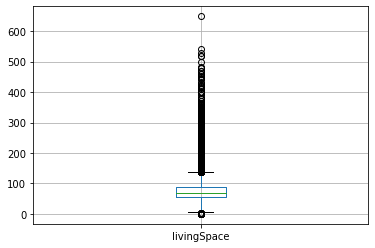

In [68]:
data[['livingSpace']].boxplot()
plt.show()

#### geo_krs = city, county, municipality (Stadt, Landkreis, Gemeinde)

In [69]:
data["geo_krs"].value_counts(dropna=False).head()

Leipzig      13714
Chemnitz     12553
Berlin       10388
Dresden       7515
Magdeburg     4859
Name: geo_krs, dtype: int64

In [70]:
data["geo_krs"].value_counts(dropna=False).tail()

Lichtenfels_Kreis               31
Freyung_Grafenau_Kreis          30
Haßberge_Kreis                  24
Neustadt_a.d._Waldnaab_Kreis    16
Kronach_Kreis                   12
Name: geo_krs, dtype: int64

In [71]:
data["geo_krs"].isna().sum()

0

#### condition = condition (Zustand)

In [72]:
data["condition"].value_counts(dropna=False).head(60)

NaN                                   68250
well_kept                             66471
refurbished                           26943
fully_renovated                       26328
first_time_use                        21920
mint_condition                        21900
modernized                            17194
first_time_use_after_refurbishment    15678
negotiable                             2235
need_of_renovation                     1360
ripe_for_demolition                       4
Name: condition, dtype: int64

In [73]:
data["condition"] = data["condition"].fillna('unknown')

#### interiorQual = interior quality (Innenraum Qualität/Klasse)

In [74]:
data["interiorQual"].value_counts(dropna=False).head(60)

NaN              112345
normal            81701
sophisticated     64668
luxury             7623
simple             1946
Name: interiorQual, dtype: int64

In [75]:
data["interiorQual"] = data["interiorQual"].fillna('unknown')

#### petsAllowed = pets allowed (Haustiere erlaubt)

In [76]:
data["petsAllowed"].value_counts(dropna=False).head(60)

NaN           114271
negotiable     91817
no             51895
yes            10300
Name: petsAllowed, dtype: int64

In [77]:
data["petsAllowed"] = data["petsAllowed"].fillna('unknown')

#### street = street name (Straßenname)

In [78]:
data["street"].value_counts(dropna=False).head()

no_information            70734
Hauptstra&szlig;e           933
Bahnhofstra&szlig;e         851
Leipziger Stra&szlig;e      440
Goethestra&szlig;e          414
Name: street, dtype: int64

In [79]:
data["street"].isna().sum()

0

#### streetPlain = street name (Straßenname)

In [80]:
data["streetPlain"].value_counts(dropna=False).head()

NaN                 70734
Hauptstraße           908
Bahnhofstraße         832
Leipziger_Straße      428
Goethestraße          405
Name: streetPlain, dtype: int64

In [81]:
data["streetPlain"].isna().sum()

70734

In [82]:
data["streetPlain"] = data["streetPlain"].fillna('unknown')

#### lift = presence of an elevator (Vorhandensein eines Aufzug)

In [83]:
data["lift"].value_counts(dropna=False).head()

False    205047
True      63236
Name: lift, dtype: int64

#### baseRentRange = price of Rent in bins (lowest=1; highest=9)

In [84]:
data["baseRentRange"].value_counts(dropna=False).head(20)

2    54483
1    47880
5    37974
3    37092
7    27476
4    25799
6    24192
8     8245
9     5142
Name: baseRentRange, dtype: int64

In [85]:
data["baseRentRange"].isna().sum()

0

#### typeOfFlat = kind of apartment (Art der Wohnung)

In [86]:
data["typeOfFlat"].value_counts(dropna=False).head(20)

apartment              131264
NaN                     36548
roof_storey             34719
ground_floor            31458
other                    9459
maisonette               9311
raised_ground_floor      5622
penthouse                3560
terraced_flat            3383
half_basement            2007
loft                      952
Name: typeOfFlat, dtype: int64

In [87]:
data["typeOfFlat"] = data["typeOfFlat"].fillna('unknown')

#### geo_plz = Postal code (Postleitzahl)

In [88]:
data["typeOfFlat"].value_counts(dropna=False).head(20)

apartment              131264
unknown                 36548
roof_storey             34719
ground_floor            31458
other                    9459
maisonette               9311
raised_ground_floor      5622
penthouse                3560
terraced_flat            3383
half_basement            2007
loft                      952
Name: typeOfFlat, dtype: int64

In [89]:
data["geo_plz"].isna().sum()

0

#### noRooms = Number of rooms excluding kitchen and bathroom (Anzahl Räume exklusive Küche und Bad)

In [90]:
data["noRooms"].value_counts(dropna=False).head(20)

3.0     91927
2.0     88890
4.0     27729
1.0     27669
2.5      9571
3.5      8889
5.0      5707
1.5      3399
4.5      2071
6.0      1303
5.5       350
7.0       339
8.0       124
2.1        67
6.5        66
9.0        38
2.2        32
10.0       23
7.5        18
11.0       10
Name: noRooms, dtype: int64

In [91]:
data.loc[data['noRooms']>=15]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
5206,Berlin,228.0,floor_heating,ONE_YEAR_FREE,0.0,True,True,29,10.09,40.0,1970.80,2018.0,113765075,0.0,district_heating,True,Berlin,True,9.0,1584.8,41,3.00,Berlin,first_time_use,sophisticated,negotiable,Delbr&uuml;ckstra&szlig;e,Delbrückstraße,True,8,apartment,12051,99.50,NaN,3.0,6.0,5,False,1,Berlin,Neukölln_Neukölln,Die hochwertige Etagenwohnung in der Delbrücks...,Moderne Einbauküche\nHauswirtschaftsraum\nFahr...,158.0,NaN,2018.0,NaN,NaN,Oct19
17897,Nordrhein_Westfalen,85.5,district_heating,ONE_YEAR_FREE,0.0,False,True,1,3.85,40.0,451.50,1973.1,111390612,0.0,unknown,False,Nordrhein_Westfalen,False,4.1,307.0,1,57.00,Märkischer_Kreis,unknown,unknown,yes,no_information,unknown,False,2,apartment,58638,200.00,NaN,NaN,NaN,5,False,2,Märkischer_Kreis,Iserlohn,Diese attraktive 2-Zimmer-Wohnung liegt in ruh...,- Balkon\n- Aufzug\n- Tageslichtbad mit Wanne\...,59.0,NaN,NaN,NaN,NaN,May19
18961,Niedersachsen,0.0,district_heating,unknown,0.0,False,False,9,4.19,40.0,395.00,1993.0,98762424,0.0,district_heating,True,Niedersachsen,False,5.0,395.0,8 + 9,14.00,Hannover,well_kept,normal,no,Dreyerstra&szlig;e,Dreyerstraße,True,2,other,30169,140.00,128.60,NaN,5.0,5,True,1,Hannover,Calenberger_Neustadt,"In der ruhigen Dreyerstraße Nr. 8 + 9 gelegen,...",Du hast die Chance zwischen unterschiedlichen ...,0.0,D,NaN,NaN,NaN,Oct19
36872,Baden_Württemberg,250.0,central_heating,ONE_YEAR_FREE,0.0,False,True,11,7.21,10.0,814.11,1973.1,113430537,1.0,unknown,True,Baden_Württemberg,True,4.1,1100.0,29,128.00,Heilbronn,mint_condition,sophisticated,negotiable,S&uuml;lmerstra&szlig;e,Sülmerstraße,False,7,apartment,74072,305.00,NaN,2.0,3.0,5,False,6,Heilbronn,Heilbronner_Kernstadt,"Diese kernsanierte und modern eingerichtete 3,...",- Linoleum- und Fliesenböden\n- isolierverglas...,NaN,NaN,2011.0,NaN,NaN,Oct19
43563,Sachsen,151.1,central_heating,unknown,0.0,False,False,7,0.97,40.0,814.11,1928.0,107743756,0.0,gas,True,Sachsen,False,1.0,380.0,1,79.00,Zwickau_Kreis,unknown,unknown,unknown,no_information,unknown,False,2,unknown,8451,25.00,136.40,3.0,NaN,5,False,3,Zwickau_Kreis,Crimmitschau,Hierbei handelt es sich um eine ca. 80m² große...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
52202,Thüringen,120.0,central_heating,ONE_YEAR_FREE,0.0,False,False,5,2.03,40.0,370.00,1973.1,113255788,1.0,unknown,False,Thüringen,False,4.1,250.0,14,60.00,Gera,refurbished,normal,negotiable,Georg-B&uuml;chner-Str.,Georg-Büchner-Str.,False,1,unknown,7548,22.00,153.61,3.0,4.0,5,False,2,Gera,Debschwitz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct19
63453,Nordrhein_Westfalen,250.0,central_heating,ONE_YEAR_FREE,0.0,False,True,24,3.28,40.0,1500.00,1960.0,110935326,0.0,gas,False,Nordrhein_Westfalen,True,2.0,1250.0,1,150.00,Wuppertal,well_kept,sophisticated,no,no_information,unknown,False,7,other,42115,45.00,NaN,2.0,2.0,5,True,6,Wuppertal,Elberfeld_West,Doppelhaushälfte 60er Jahre mit nicht einsehba...,Im (Hoch-)Parterre befinden sich die offene Wo...,NaN,NaN,NaN,NaN,NaN,Oct19
70070,Nordrhein_Westfalen,100.0,night_storage_heater,ONE_YEAR_FREE,0.0,False,False,1,3.64,40.0,400.00,1973.1,106809443,0.0,unknown,False,Nordrhein_Westfalen,True,4.1,300.0,297-299,45.00,Duisburg,modernized,normal,yes,Friedrich-Ebert-Stra&szlig;e,Friedrich-Ebert-Straße,False,1,roof_storey,47139,25.00,NaN,3.0,3.0,5,False,2,Duisburg,Beeck,Die Wohnung befindet sich im 3. Obergeschoss e...,Die Wohnung ist komplett Renoviert.\n\nNeue Sa...,NaN,NaN,NaN,90.76,0.1915,Sep18
77343,Branden

In [92]:
data.drop(data.loc[data['noRooms']>=15].index, inplace=True)

#### thermalChar

In [93]:
data["thermalChar"].value_counts(dropna=False).head(10)

NaN      106211
105.0       931
100.0       913
114.0       875
80.0        870
87.0        862
79.0        852
90.0        849
85.0        845
96.0        841
Name: thermalChar, dtype: int64

In [94]:
mean = round(data['thermalChar'].mean(),2)
print("The mean is: ",mean)
data['thermalChar'] = data['thermalChar'].fillna(114.11)
data["thermalChar"].value_counts(dropna=False).head(10)

The mean is:  114.72


114.11    106211
105.00       931
100.00       913
114.00       875
80.00        870
87.00        862
79.00        852
90.00        849
85.00        845
96.00        841
Name: thermalChar, dtype: int64

#### floor = floor  (Stockwerk)

In [95]:
data["floor"].value_counts(dropna=False).head(50)

 1.0      64016
 2.0      56849
 NaN      51141
 3.0      37804
 0.0      24521
 4.0      19917
 5.0       7976
 6.0       2488
 7.0       1028
 8.0        578
 9.0        427
 10.0       363
-1.0        309
 11.0       236
 12.0       144
 13.0       133
 14.0       110
 15.0        61
 16.0        34
 17.0        27
 19.0        15
 21.0        12
 18.0        11
 20.0        10
 80.0         6
 22.0         4
 136.0        3
 24.0         3
 137.0        2
 98.0         2
 29.0         2
 26.0         2
 99.0         2
 37.0         1
 135.0        1
 999.0        1
 650.0        1
 390.0        1
 645.0        1
 83.0         1
 105.0        1
 36.0         1
 41.0         1
 133.0        1
 45.0         1
 31.0         1
 134.0        1
 138.0        1
 32.0         1
 124.0        1
Name: floor, dtype: int64

In [96]:
mean = round(data['floor'].mean(),2)
print("The mean is: ",mean)
data['floor'] = data['floor'].fillna(2.1)
data["floor"].value_counts(dropna=False).head(10)

The mean is:  2.12


1.0    64016
2.0    56849
2.1    51141
3.0    37804
0.0    24521
4.0    19917
5.0     7976
6.0     2488
7.0     1028
8.0      578
Name: floor, dtype: int64

In [97]:
data.loc[data['floor']>=25].shape

(39, 49)

In [98]:
data.drop(data.loc[data['floor']>=25].index, inplace=True)

#### numberOfFloors = number of floors (Geschosszahl/Anzahl Stockwerke)

In [99]:
data["numberOfFloors"].value_counts(dropna=False).head(20)

NaN     97517
3.0     50706
4.0     39798
2.0     37276
5.0     19808
1.0      8422
6.0      6266
7.0      2551
0.0      1305
8.0      1133
11.0     1004
10.0      572
9.0       514
14.0      239
12.0      195
16.0      170
13.0      169
15.0      122
17.0      102
18.0       73
Name: numberOfFloors, dtype: int64

In [100]:
mean = round(data['numberOfFloors'].mean(),2)
print("The mean is: ",mean)
data['numberOfFloors'] = data['numberOfFloors'].fillna(3.1)
data["numberOfFloors"].value_counts(dropna=False).head(10)

The mean is:  3.57


3.1    97517
3.0    50706
4.0    39798
2.0    37276
5.0    19808
1.0     8422
6.0     6266
7.0     2551
0.0     1305
8.0     1133
Name: numberOfFloors, dtype: int64

In [101]:
data.loc[data['numberOfFloors']>=25].shape

(69, 49)

In [102]:
data.drop(data.loc[data['numberOfFloors']>=25].index, inplace=True)

#### noRoomsRange = Number of rooms excluding kitchen and bathroom (Anzahl Räume exklusive Küche und Bad)

In [103]:
data["noRoomsRange"].value_counts(dropna=False).head(20)

3    100793
2     98516
1     31058
4     29794
5      7987
Name: noRoomsRange, dtype: int64

In [104]:
data["noRoomsRange"].isna().sum()

0

#### garden = presence of a garden (Vorhandensein eines Gartens)

In [105]:
data["garden"].value_counts(dropna=False).head(20)

False    215532
True      52616
Name: garden, dtype: int64

#### livingSpaceRange = Number of rooms excluding kitchen and bathroom (Anzahl Räume exklusive Küche und Bad)

In [106]:
data["livingSpaceRange"].value_counts(dropna=False).head(20)

3    82271
2    76222
4    42727
1    26885
5    20488
6    12835
7     6720
Name: livingSpaceRange, dtype: int64

#### regio2 = city, county, municipality (Stadt, Landkreis, Gemeinde)

In [107]:
data["regio2"].value_counts(dropna=False).head(20)

Leipzig                 13708
Chemnitz                12552
Berlin                  10380
Dresden                  7509
Magdeburg                4858
Halle_Saale              4561
München                  4372
Essen                    4298
Frankfurt_am_Main        4266
Hamburg                  3753
Düsseldorf               3708
Duisburg                 3518
Mittelsachsen_Kreis      3149
Dortmund                 3134
Gelsenkirchen            2932
Recklinghausen_Kreis     2751
Köln                     2691
Zwickau                  2534
Wuppertal                2372
Leipzig_Kreis            2313
Name: regio2, dtype: int64

In [108]:
data["regio2"].isna().sum()

0

#### regio3 = location within the city (Lage innerhalb der Stadt)

In [109]:
data["regio3"].value_counts(dropna=False).head(20)

Innenstadt               4736
Stadtmitte               2692
Altstadt                 2333
Sonnenberg               1907
Kaßberg                  1710
Mitte                    1607
Hilbersdorf              1295
Schloßchemnitz           1262
Zentrum                  1131
Südstadt                 1115
Gablenz                   885
Merseburg                 880
Freiberg                  875
Bernsdorf                 850
Stadtfeld_Ost             826
Mitte_Mitte               798
Lutherviertel             793
Tiergarten_Tiergarten     770
Riesa                     745
Halberstadt               728
Name: regio3, dtype: int64

In [110]:
data["regio3"].isna().sum()

0

#### description = description (Beschreibung, Freitext)

In [111]:
data["description"].value_counts(dropna=False).head(5)

NaN                                                                                                                                                                                                                                                                                                                                                                                                   19700
+ MEIN GUENTZ - Quartier der Generationen\r\n+ bis 2020 fertiggestellter Neubau in Johannstadt-Nord\r\n+ Wohnen und Nahversorger in einem Areal\r\n  (REWE-Supermarkt, Drogerie ROSSMANN, Bäckerei Schwerdtner, TUI-Reisecenter)\r\n+ Kleinst- bis Familienwohnungen mit optimalen Grundrissen\r\n+ Innenbereich mit begrünten Erholungsflächen und einem Spielplatz sowie Ruhezonen zum Verweilen      216
saniertes Mehrfamilienhaus                                                                                                                                                                                      

In [112]:
data["description"].isna().sum()

19700

In [113]:
data["description"] = data["description"].fillna('unknown')

#### facilities = facilities, equipment details (Ausstattungsdetails)

In [114]:
data["facilities"].value_counts(dropna=False).head(5)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           52653
Laminat                                                                                                                                                                                                             

In [115]:
data["facilities"] = data["facilities"].fillna('unknown')

#### heatingCosts = heating costs (Heizkosten)

In [116]:
data["heatingCosts"].value_counts(dropna=False).head(5)

NaN     182822
60.0      5300
70.0      4805
80.0      4751
50.0      4280
Name: heatingCosts, dtype: int64

In [117]:
mean = round(data['heatingCosts'].mean(),2)
print("The mean is: ",mean)
data['heatingCosts'] = data['heatingCosts'].fillna(77.111)
data["heatingCosts"].value_counts(dropna=False).head(10)

The mean is:  76.99


77.111     182822
60.000       5300
70.000       4805
80.000       4751
50.000       4280
100.000      3964
90.000       3011
0.000        2699
75.000       2598
65.000       2581
Name: heatingCosts, dtype: int64

#### energyEfficiencyClass = energy efficiency class (Energieeffizienzklasse)

In [118]:
data["energyEfficiencyClass"].value_counts(dropna=False).head(20)

NaN               190557
C                  14595
NO_INFORMATION     14083
D                  13877
B                  11321
E                   7963
A                   4968
F                   4471
A_PLUS              3617
G                   1801
H                    895
Name: energyEfficiencyClass, dtype: int64

In [119]:
data["energyEfficiencyClass"] = data["energyEfficiencyClass"].fillna('unknown')
data.loc[data['energyEfficiencyClass'].str.contains('NO_INFORMATION'), 'energyEfficiencyClass'] = 'unknown'

In [120]:
data["energyEfficiencyClass"].value_counts(dropna=False).head(20)

unknown    204640
C           14595
D           13877
B           11321
E            7963
A            4968
F            4471
A_PLUS       3617
G            1801
H             895
Name: energyEfficiencyClass, dtype: int64

#### lastRefurbish = last refurbish (letzte Renovierung)

In [121]:
data["lastRefurbish"].value_counts(dropna=False).head(10)

NaN       187609
2019.0     20173
2018.0     13166
2017.0      7096
2016.0      5670
2015.0      4632
2020.0      3640
2014.0      3465
2013.0      2459
2012.0      2273
Name: lastRefurbish, dtype: int64

In [122]:
mean = round(data['lastRefurbish'].mean(),2)
print("The mean is: ",mean)
data['lastRefurbish'] = data['lastRefurbish'].fillna(2009.1)
data["lastRefurbish"].value_counts(dropna=False).head(10)
# chose 2009.1 and not the mean (2013) because I think a NaN-value indicates a long ago last efurbishment

The mean is:  2013.91


2009.1    187609
2019.0     20173
2018.0     13166
2017.0      7096
2016.0      5670
2015.0      4632
2020.0      3640
2014.0      3465
2013.0      2459
2012.0      2273
Name: lastRefurbish, dtype: int64

In [123]:
data.loc[data['lastRefurbish']>=2021].shape

(13, 49)

In [124]:
data.drop(data.loc[data['lastRefurbish']>=2021].index, inplace=True)

In [125]:
data.loc[data['lastRefurbish']<=1950].shape

(21, 49)

In [126]:
data.drop(data.loc[data['lastRefurbish']<=1950].index, inplace=True)

#### electricityBasePrice = electricity base price (Grundpreis Strom)

In [127]:
data["electricityBasePrice"].value_counts(dropna=False).head(20)

NaN      221401
90.76     42730
71.43      3983
Name: electricityBasePrice, dtype: int64

In [128]:
mean = round(data['electricityBasePrice'].mean(),2)
print("The mean is: ",mean)
data['electricityBasePrice'] = data['electricityBasePrice'].fillna(89.11)
data["electricityBasePrice"].value_counts(dropna=False).head(10)

The mean is:  89.11


89.11    221401
90.76     42730
71.43      3983
Name: electricityBasePrice, dtype: int64

In [129]:
data["electricityBasePrice"].value_counts(dropna=False).head(20)

89.11    221401
90.76     42730
71.43      3983
Name: electricityBasePrice, dtype: int64

#### electricityKwhPrice = electricity price in Euro/kWh (Strompreis in Euro/kWh)

In [130]:
data["electricityKwhPrice"].value_counts(dropna=False).head()

NaN       221401
0.1985     14576
0.2055     13044
0.1915     10094
0.1845      2946
Name: electricityKwhPrice, dtype: int64

In [131]:
mean = round(data['electricityKwhPrice'].mean(),2)
print("The mean is: ",mean)
data['electricityKwhPrice'] = data['electricityKwhPrice'].fillna(0.21111)
data["electricityKwhPrice"].value_counts(dropna=False).head()

The mean is:  0.2


0.21111    221401
0.19850     14576
0.20550     13044
0.19150     10094
0.18450      2946
Name: electricityKwhPrice, dtype: int64

#### date = date of scaping (Datum des Scapings)

In [132]:
data["date"].value_counts(dropna=False).head()

Feb20    79095
May19    75816
Oct19    66494
Sep18    46709
Name: date, dtype: int64

In [133]:
data["date"].isna().sum()

0

In [134]:
data.shape

(268114, 49)

# New column: Euro/m²

In [135]:
data['Euro/m2']=round(data['baseRent']/data['livingSpace'],2)

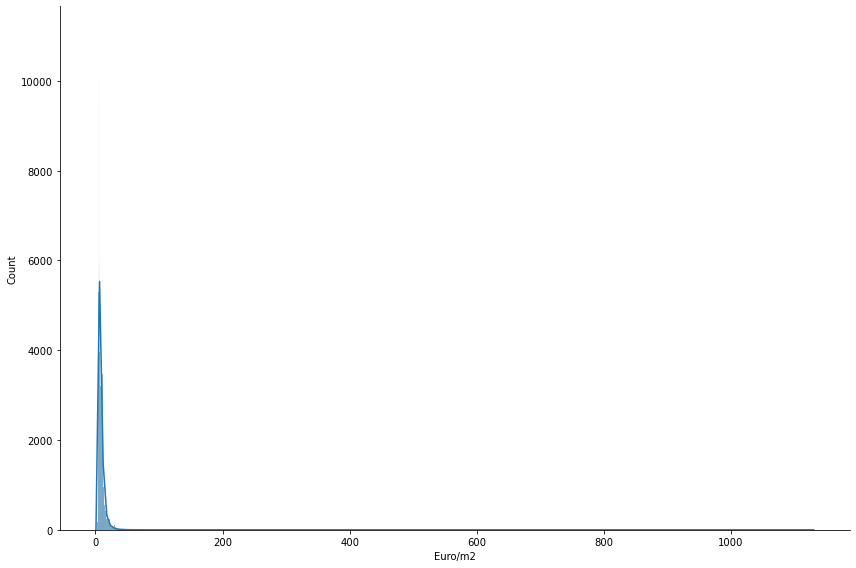

In [136]:
# immo_serviceCharge=immo_with_NaN[immo_with_NaN.serviceCharge <= 600]
sns.displot(data['Euro/m2'], kde=True, height=8, aspect=12/8)
plt.show()

In [137]:
data_pricy = data.loc[data['Euro/m2'] >= 50]
data_pricy.head(1)
display(data_pricy[['baseRent', 'livingSpace', 'Euro/m2']].head(10))

,baseRent,livingSpace,Euro/m2
1160,640.0,11.0,58.18
2637,640.0,10.0,64.00
3444,620.0,0.0,inf
4356,1200.0,24.0,50.00
4766,640.0,10.0,64.00
4951,1100.0,18.0,61.11
5164,990.0,18.0,55.00
5191,820.0,16.0,51.25
5695,1200.0,22.0,54.55
6164,1080.0,14.0,77.14


In [138]:
display(round(data_pricy[['baseRent', 'livingSpace', 'Euro/m2']].describe(),0).T)

,count,mean,std,min,25%,50%,75%,max
baseRent,304.0,1093.0,1001.0,110.0,670.0,870.0,1140.0,9999.0
livingSpace,304.0,14.0,13.0,0.0,10.0,14.0,18.0,98.0
Euro/m2,304.0,inf,NaN,50.0,55.0,61.0,96.0,inf


In [139]:
data_priciest = data.loc[data['Euro/m2'] >= 100]
display(data_priciest[['baseRent', 'livingSpace', 'Euro/m2']].head(10))

,baseRent,livingSpace,Euro/m2
3444,620.0,0.0,inf
7775,1130.0,1.0,1130.0
9343,795.0,1.0,795.0
11127,775.0,0.0,inf
15014,110.0,0.0,inf
16581,1560.0,12.0,130.0
17278,160.0,0.0,inf
20165,720.0,0.0,inf
26559,4020.0,30.0,134.0
27091,2500.0,25.0,100.0


In [140]:
display(round(data_priciest[['baseRent', 'livingSpace', 'Euro/m2']].describe(),0).T)

,count,mean,std,min,25%,50%,75%,max
baseRent,74.0,1152.0,1635.0,110.0,412.0,690.0,1071.0,9999.0
livingSpace,74.0,4.0,15.0,0.0,0.0,0.0,0.0,98.0
Euro/m2,74.0,inf,NaN,100.0,NaN,NaN,NaN,inf


In [141]:
data.drop(data.loc[data['Euro/m2']>=50].index, inplace=True)

In [142]:
display(round(data[['baseRent', 'livingSpace', 'Euro/m2']].describe(),0).T)

,count,mean,std,min,25%,50%,75%,max
baseRent,267810.0,646.0,491.0,101.0,338.0,490.0,799.0,9500.0
livingSpace,267810.0,74.0,32.0,7.0,54.0,67.0,87.0,649.0
Euro/m2,267810.0,9.0,5.0,1.0,6.0,7.0,10.0,50.0


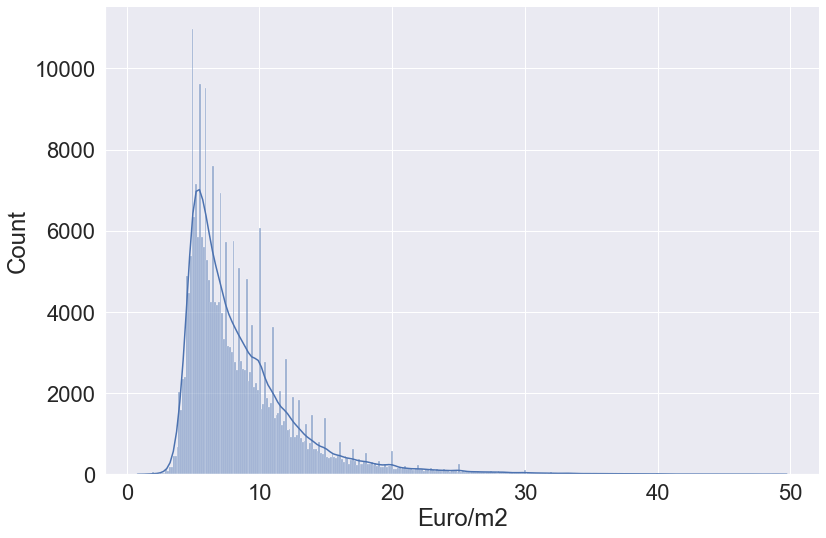

8.7

In [143]:
sns.set(font_scale=2)
sns.displot(data['Euro/m2'], kde=True, height=8, aspect=12/8)
plt.show()
display(round(data['Euro/m2'].mean(), 2))

In [144]:
binnames = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13","14","15"]
bins = pd.cut(data['Euro/m2'],[0,4,5,6,7,8,9,10,12,14,16,20,25,30,40,50], labels = binnames)
bins.value_counts(dropna=False)

3     50736
4     37982
2     31588
5     29032
8     27073
6     23870
7     22138
9     15774
11     9022
10     8602
12     4390
1      3940
13     1968
14     1341
15      354
Name: Euro/m2, dtype: int64

In [145]:
data['price_class'] = pd.cut(data['Euro/m2'],[0,4,5,6,7,8,9,10,12,14,16,20,25,30,40,50], labels = binnames)

In [146]:
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,0.0,False,False,6,4.62,10.0,840.00,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,0.0,False,True,8,3.47,10.0,814.11,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,1,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,unknown,False,5,ground_floor,67459,3.0,114.11,2.1,3.1,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,unknown,77.111,unknown,2019.0,89.11,0.21111,May19,8.99,6
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.00,2019.0,113147523,1.0,unknown,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,unknown,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,114.11,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",77.111,unknown,2009.1,89.11,0.21111,Oct19,11.52,8
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,0.0,False,True,9,1.53,40.0,814.11,1964.0,108890903,0.0,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,unknown,unknown,unknown,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,3.1,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,unknown,87.230,unknown,2009.1,89.11,0.21111,May19,5.90,3
4,Bremen,138.00,self_contained_central_heating,unknown,0.0,False,True,19,2.46,40.0,903.00,1950.0,114751222,0.0,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,unknown,unknown,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,3.1,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,77.111,unknown,2009.1,89.11,0.21111,Feb20,9.00,6


# Save New Database

In [147]:
data.to_csv('immo.csv')

In [148]:
data.shape

(267810, 51)

# alternative Database

In [149]:
alt_data = pd.read_csv('immo_data.csv')
alt_data['Euro/m2']=round(alt_data['baseRent']/alt_data['livingSpace'],2)
alt_data.drop(alt_data.loc[alt_data['Euro/m2']>=50].index, inplace=True)

binnames = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13","14","15"]
alt_data['price_class'] = pd.cut(alt_data['Euro/m2'],[0,4,5,6,7,8,9,10,12,14,16,20,25,30,40,50], labels = binnames)

alt_data.to_csv('alt_immo.csv')

In [150]:
alt_data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19,6.92,4
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19,8.99,6
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19,11.52,8
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19,5.90,3
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20,9.00,6
